>  # Extraindo uma paleta de cores através do K-means 

#### Neste trabalho vamos criar uma paleta de cores hexadecimal através da tecnica de agrupamento não supervisionado com a ajuda do Kmeans do pacote stats do R. 


#### O processo principal consiste em importar uma foto, tratar a foto extraindo arrays, Gerar o agrupamento e  ao final será exibido uma imagem com a quantidade de cores principais escolhidas e um arquivo será exportado com os códigos hexadecimais. Estes codigos são a base para a identificação da cor pelo sistema RGB dos Sistemas operacionais como Windons, Linux e MacOS

##### Importando pacotes e bibliotecas necessárias.

In [20]:
install.packages('tidyverse')
install.packages('jpeg')
install.packages("magrittr")
install.packages("dplyr")

library(jpeg)
library(magrittr)
library(tidyverse)
library(dplyr)
library(tibble)
options(warn=-1)

also installing the dependencies 'rlang', 'vctrs'



package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ralis\AppData\Local\Temp\RtmpWaMiAB\downloaded_packages


##### Importando o arquivo com a foto

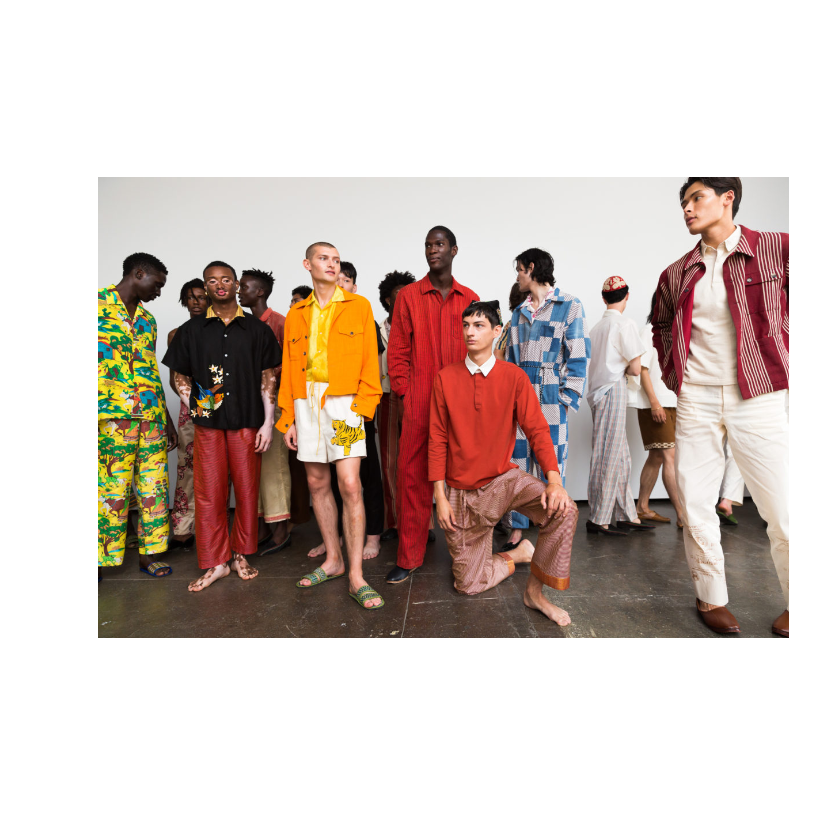

In [21]:
img <- readJPEG("foto.jpg") #imagem é carregada como um array de 3 canais (RBG) 
plot(as.raster(img)) # plotagem o array da foto para identificação

##### Criando a matriz de arrays e agrupando na quantidade de cores escolhidas para a paleta. Ao final temos 6 cores com seus códigos hexadecimais.

In [22]:
img_matrix <- apply(img, 3, as.numeric)  # matriz principal com o RGB da foto
km <- kmeans(img_matrix, centers = 6) # matriz principal com clusters - definir numeros de clusters.
img_df <- tibble(
  r = img_matrix[,1], 
  g = img_matrix[,2], 
  b = img_matrix[,3],
  cluster = km$cluster
)
centroides <- img_df %>% # agrupando os centroides e sumarizando com as funções do pacote dplyr
  group_by(cluster) %>%
  summarise_all(mean)


# Representação Hexadecial dos centroides

centroides <- centroides %>%
  mutate(cor = rgb(r, g, b))
centroides$cor


[1] "#E6E2DE" "#B79789" "#5F5245" "#AA2D29" "#EFA917" "#2D1B17"

##### Exibindo a paleta de cores e exportando a tabela hexadecimal para o seu diretorio

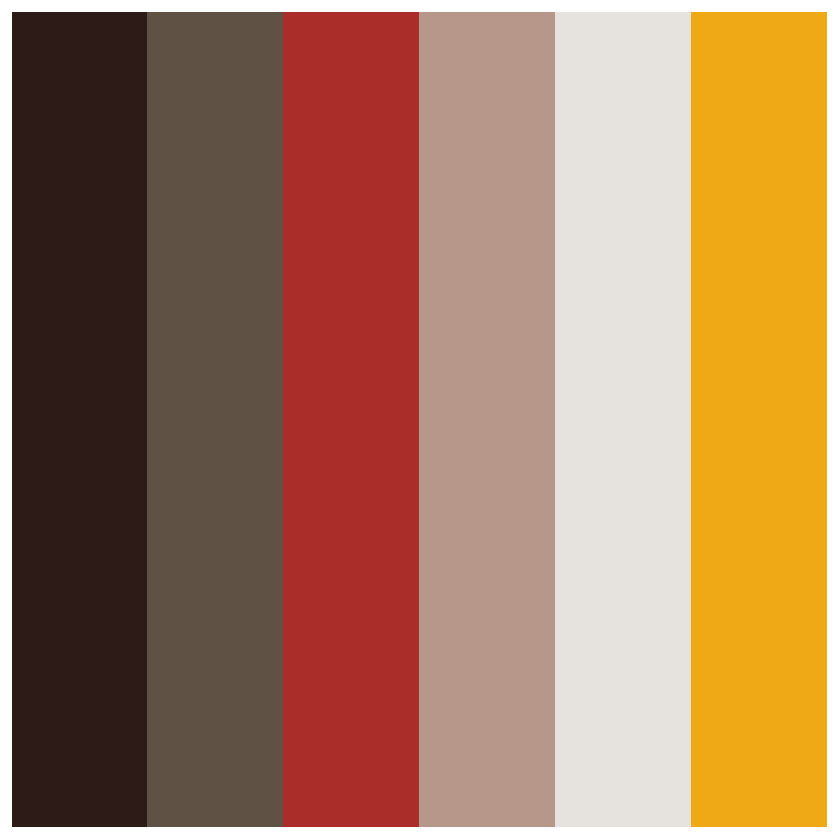

In [23]:
paleta <- function(x) {
  n <- length(x)
  old <- par(mar = c(0.5, 0.5, 0.5, 0.5))
  on.exit(par(old))
  
  image(1:n, 1, as.matrix(1:n), col = x,
        ylab = "", xaxt = "n", yaxt = "n", bty = "n")
}
paleta(sort.default(centroides$cor))

#exporta arquivo de hexadecimais em csv
exporta_tabela = write.csv(centroides, "cor.csv")